<a href="https://colab.research.google.com/github/URK21CS1072/YBI-internship/blob/main/YBI_hand_written_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE: Hand Written Digit Prediction - Classification Analysis** 

**Objective:**
  The digits dataset consists of 8x8 pixel images of digits. The images attribute of the the dataset stores 8x8 arrays of grayscale values for each image . We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

**Data Source**

**Import Library :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Import Data:**

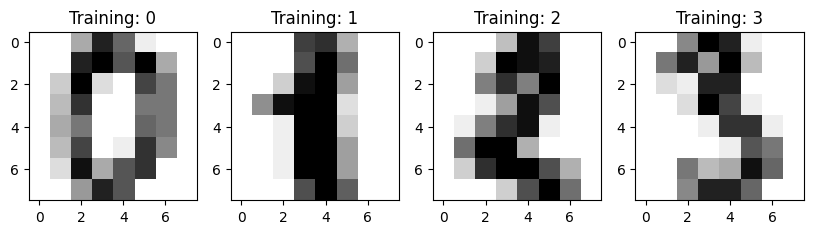

In [6]:
from sklearn.datasets import load_digits
df = load_digits() 
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images, df.target):
  ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

**Describe Data**

The given data consists of a dataset called "digits," which contains 8x8 pixel images of handwritten digits (0-9). Each image is represented as an 8x8 array of grayscale values (ranging from 0 to 16) and is stored in the dataset's "images" attribute. The dataset also has a "target" attribute that stores the corresponding digit each image represents.


**Data Visualization**

To visualize the first 4 images, the 8x8 arrays are used to plot grayscale images using a Python visualization library such as matplotlib. The "target" attribute is used to label each image with its corresponding digit.

**Data Preprocessing**
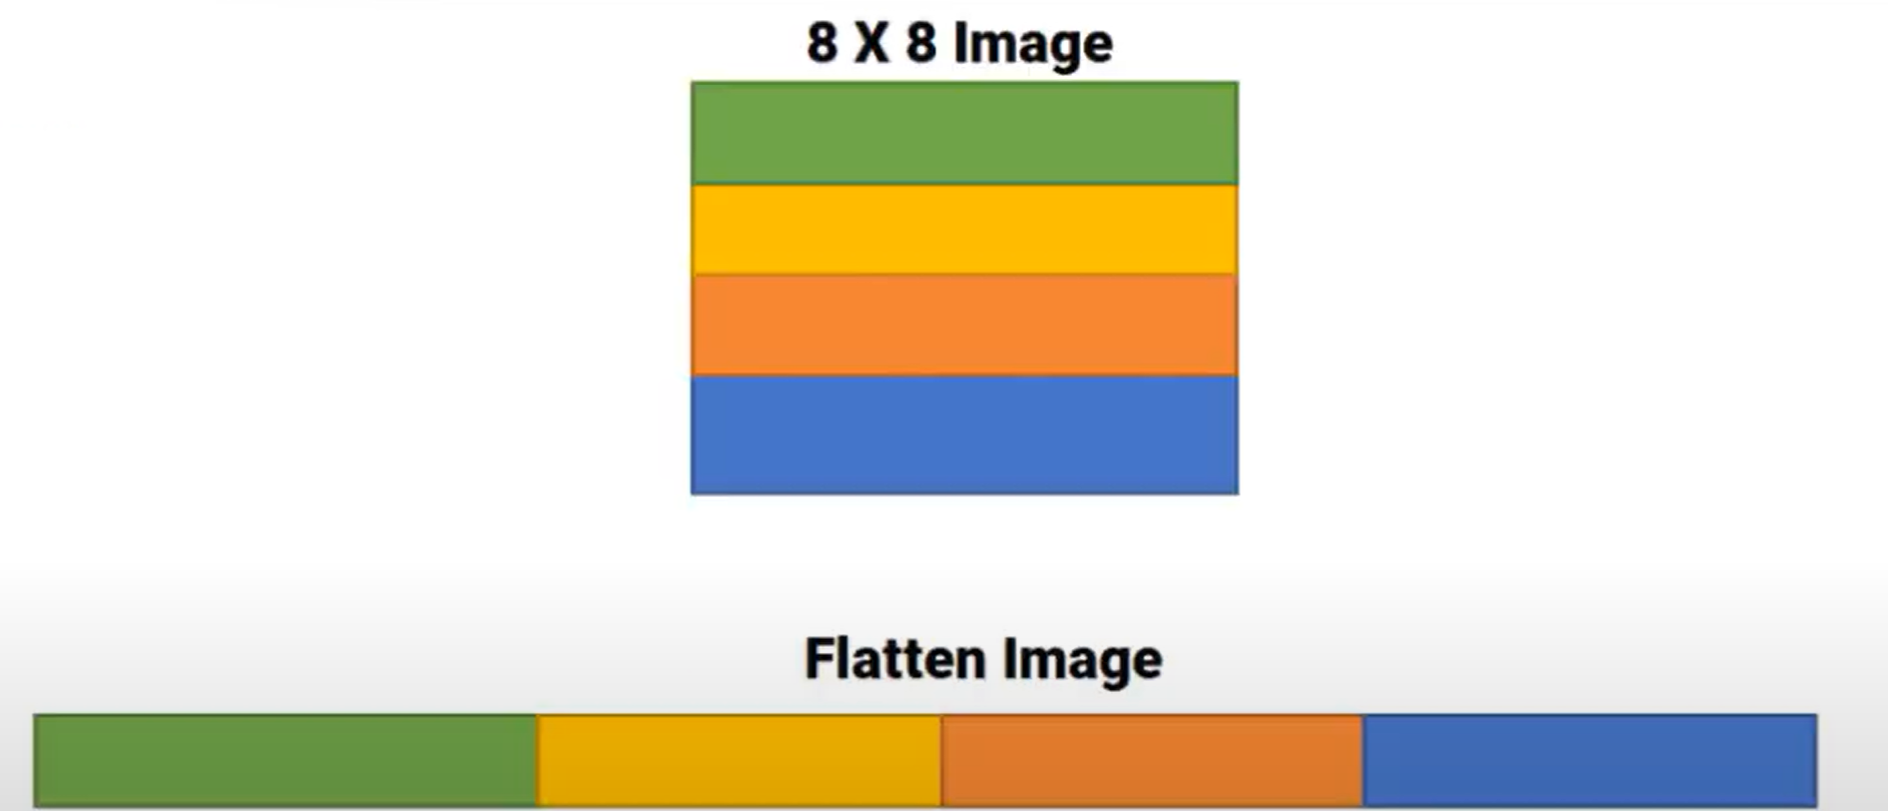

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

**Scaling Image Data**

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Define Target Variable (y) and Feature Variables (X)**


**Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Modeling:**
Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()


**Model Accuracy**:

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 42,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 50,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 68,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 61,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 51]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.96      1.00      0.98        49
           2       1.00      1.00      1.00        52
           3       0.98      0.95      0.97        44
           4       0.98      0.96      0.97        51
           5       0.94      0.94      0.94        53
           6       1.00      0.99      0.99        69
           7       0.94      1.00      0.97        48
           8       0.95      0.95      0.95        64
           9       0.98      0.94      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**Prediction**

In [26]:
y_pred = rf.predict(X_test)
y_pred 

array([8, 6, 9, 1, 1, 8, 9, 1, 6, 3, 7, 3, 5, 2, 3, 6, 5, 0, 9, 2, 8, 5,
       9, 2, 7, 1, 8, 5, 0, 2, 7, 9, 0, 3, 0, 9, 4, 5, 8, 0, 8, 1, 0, 1,
       0, 3, 7, 9, 2, 6, 1, 2, 4, 5, 0, 6, 7, 6, 1, 0, 3, 5, 8, 9, 5, 1,
       0, 9, 2, 6, 0, 0, 4, 7, 8, 8, 4, 4, 7, 9, 1, 7, 4, 1, 0, 9, 8, 5,
       6, 9, 6, 3, 3, 9, 0, 3, 3, 6, 6, 7, 5, 3, 5, 6, 0, 8, 2, 4, 8, 6,
       6, 9, 3, 8, 9, 7, 4, 6, 6, 8, 1, 4, 4, 2, 1, 4, 7, 3, 5, 4, 0, 0,
       2, 8, 5, 9, 8, 9, 6, 2, 0, 6, 1, 3, 2, 1, 3, 8, 9, 6, 1, 5, 6, 4,
       7, 7, 7, 2, 8, 0, 5, 0, 5, 1, 2, 0, 5, 8, 3, 8, 4, 7, 8, 6, 6, 0,
       4, 5, 4, 8, 6, 3, 8, 5, 9, 6, 7, 8, 9, 1, 7, 4, 1, 1, 3, 9, 7, 4,
       7, 8, 5, 5, 4, 8, 7, 5, 1, 5, 6, 5, 8, 7, 8, 9, 3, 8, 5, 9, 6, 5,
       3, 5, 1, 2, 6, 2, 1, 5, 9, 6, 2, 5, 1, 1, 9, 6, 9, 1, 8, 6, 0, 4,
       0, 7, 6, 1, 3, 7, 3, 5, 3, 6, 4, 8, 8, 9, 1, 4, 6, 2, 5, 5, 4, 6,
       2, 8, 8, 0, 1, 3, 9, 5, 7, 9, 3, 9, 0, 4, 0, 9, 5, 1, 3, 5, 7, 7,
       6, 8, 4, 1, 0, 0, 9, 5, 5, 8, 6, 8, 5, 9, 5,

**Explaination**

The given data consists of a dataset called "digits," which contains 8x8 pixel images of handwritten digits (0-9). Each image is represented as an 8x8 array of grayscale values (ranging from 0 to 16) and is stored in the dataset's "images" attribute. The dataset also has a "target" attribute that stores the corresponding digit each image represents.
To visualize the first 4 images, the 8x8 arrays are used to plot grayscale images using a Python visualization library such as matplotlib. The "target" attribute is used to label each image with its corresponding digit.
This process allows us to get a visual understanding of what the 8x8 arrays of grayscale values represent and how they relate to the actual digits they represent.